In [14]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import KFold
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('train.csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [18]:
y=df['target']
X=df.drop(['ID_code','target'],axis=1)

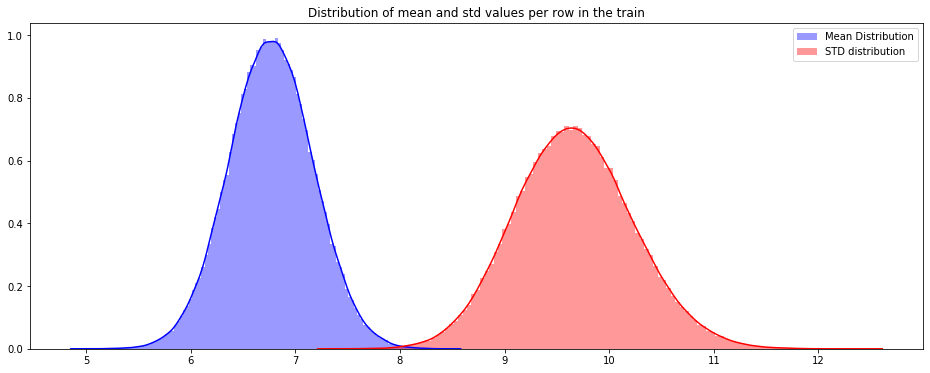

In [38]:
#check the distribution of the training data by plotting the mean and standard deviation of the observations
plt.figure(figsize=(16,6))
plt.title("Distribution of mean and std values per row in the train")
sns.distplot(X.mean(axis=1),color="blue", kde=True,bins=120, label='Mean Distribution')
sns.distplot(X.std(axis=1),color="red", kde=True,bins=120, label='STD distribution')
plt.legend()
plt.show()

From the figure above we see that our training data is normally distributed which makes GaussianNB the best model for this 

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=1)
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [20]:
model.score(X_test,y_test)

0.922625